In [1]:
%%capture
!pip install qiskit
!pip install pylatexenc

In [3]:
# initialization
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, assemble, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram

In [4]:
def dj_oracle(case, n):
  oracle_qc = QuantumCircuit(n + 1)
  
  if case == 'constant':
    if np.random.randint(2) == '1':
      oracle_qc.x(n)

  if case == 'balanced':
    b = np.random.randint(1, 2**n)
    b_str = format(b, '0'+str(n)+'b')

    for qubit in range(n):
      #if a qubit is selected by the binary string, add an X gate
      if(b_str[qubit] == '1'): oracle_qc.x(qubit)
      #add CX gates
      oracle_qc.cx(qubit, n)
      #add end X gates
      if(b_str[qubit] == '1'): oracle_qc.x(qubit)
  
  #make our circuit a gate
  oracle = oracle_qc.to_gate()
  oracle.name = "Oracle" #Will show when displaying circuit
  return oracle

def dj_algorithm(oracle, n):
  dj_qc = QuantumCircuit(n + 1, n)
  #add hadamards to input qubits to set up in |+> state
  for qubit in range(n): dj_qc.h(qubit)
  #set up output qubit in |-> state
  dj_qc.x(n); dj_qc.h(n); 
  #append oracle to the circuit
  dj_qc.append(oracle, range(n+1))
  #add end hadamards, add measurements
  for qubit in range(n):
    channel = qubit 
    dj_qc.h(qubit)
    dj_qc.measure(qubit, channel)
  
  return dj_qc 

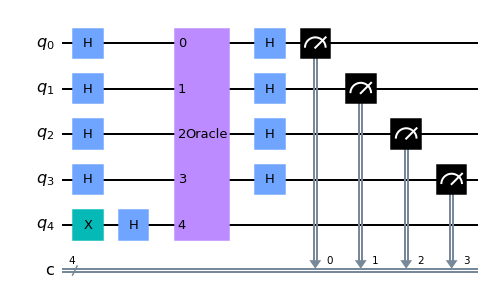

In [5]:
n = 4
oracle = dj_oracle('constant', n)
dj_circuit = dj_algorithm(oracle, n)
dj_circuit.draw(output='mpl')

#plot results

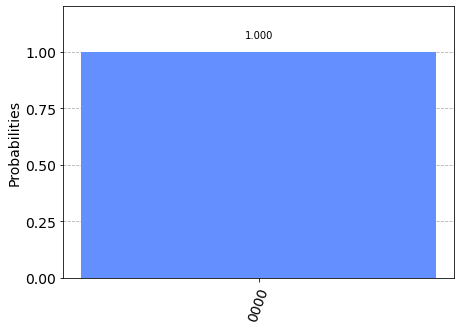

In [6]:
aer_sim = Aer.get_backend('aer_simulator')
transpiled_dj_circuit = transpile(dj_circuit, aer_sim)
qobj = assemble(transpiled_dj_circuit)
results = aer_sim.run(qobj).result()
answer = results.get_counts()
plot_histogram(answer)